# Aakash Kumar Sharma
# aakashkumarsharma2001@gmail.com
# data analytics project

In [1]:
#Importing required Libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#Importing Dataset
Train_data = pd.read_csv(r'C:\Users\Akash Sharma\Desktop\Train.csv')

In [28]:
Train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
Train_data.shape

(891, 12)

In [5]:
#null values
z = Train_data.isnull().sum()
z

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#removing column which have more than 45% of null values
drop_col = z[z>(45/100 * Train_data.shape[0])]
drop_col

Cabin    687
dtype: int64

In [7]:
drop_col.index

Index(['Cabin'], dtype='object')

In [8]:
#dropping irrelevant column
Train_Data2 = Train_data.drop(drop_col.index,axis=1)
Train_Data2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [9]:
#filling null values with mean value
Train_Data2.fillna(Train_data.mean(),inplace=True)
Train_Data2.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [10]:
#embarked column review
Train_Data2['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [11]:
#filling NA in embarked with high freqency string
Train_Data2['Embarked'].fillna('S',inplace=True)
Train_Data2.isnull().sum()
#there is not null values

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
#checking the correlation between the variables
Train_Data2.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


In [13]:
#creating new column from two columns
Train_Data2['Family Size'] = Train_Data2['SibSp'] + Train_Data2['Parch']
train =Train_Data2.drop(['SibSp','Parch'],axis=1)

train.corr()

,PassengerId,Survived,Pclass,Age,Fare,Family Size
PassengerId,1.000000,-0.005007,-0.035144,0.033207,0.012658,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.069809,0.257307,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.331339,-0.549500,0.065997
Age,0.033207,-0.069809,-0.331339,1.000000,0.091566,-0.248512
Fare,0.012658,0.257307,-0.549500,0.091566,1.000000,0.217138
Family Size,-0.040143,0.016639,0.065997,-0.248512,0.217138,1.000000


In [14]:
train['Alone'] = [0 if train['Family Size'][x]>0 else 1 for x in train.index]
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family Size,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0,1


In [15]:
train.corr()

,PassengerId,Survived,Pclass,Age,Fare,Family Size,Alone
PassengerId,1.000000,-0.005007,-0.035144,0.033207,0.012658,-0.040143,0.057462
Survived,-0.005007,1.000000,-0.338481,-0.069809,0.257307,0.016639,-0.203367
Pclass,-0.035144,-0.338481,1.000000,-0.331339,-0.549500,0.065997,0.135207
Age,0.033207,-0.069809,-0.331339,1.000000,0.091566,-0.248512,0.179775
Fare,0.012658,0.257307,-0.549500,0.091566,1.000000,0.217138,-0.271832
Family Size,-0.040143,0.016639,0.065997,-0.248512,0.217138,1.000000,-0.690922
Alone,0.057462,-0.203367,0.135207,0.179775,-0.271832,-0.690922,1.000000


In [16]:
train.groupby(['Alone'])['Survived'].mean()

Alone
0    0.505650
1    0.303538
Name: Survived, dtype: float64

In [17]:
train['Embarked'].value_counts()/train.shape[0]*100

S    72.502806
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64

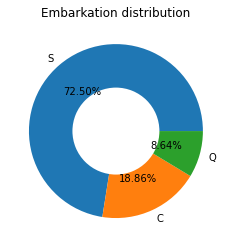

In [30]:
plt.pie(train['Embarked'].value_counts()/train.shape[0]*100,
        labels =['S','C','Q'],radius =1,
        autopct='%0.2f%%')
plt.pie([1],colors=['w'],radius=0.5)
plt.title('Embarkation distribution')

plt.show()

In [19]:
train.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

In [31]:
train['Survived'].value_counts()

#here o stands for not survived and 1 stands for survived

0    549
1    342
Name: Survived, dtype: int64

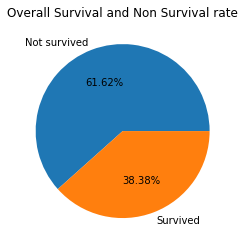

In [32]:
plt.pie(train['Survived'].value_counts(),labels=['Not survived','Survived'],autopct='%0.2f%%')
plt.title('Overall Survival and Non Survival rate')
plt.show()

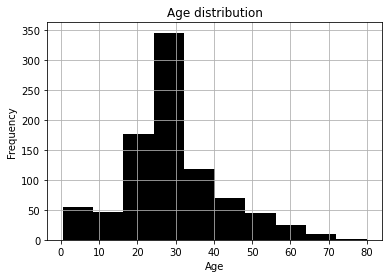

In [22]:
#checking age distribution
plt.hist(train['Age'],color="black")
plt.title("Age distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [23]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

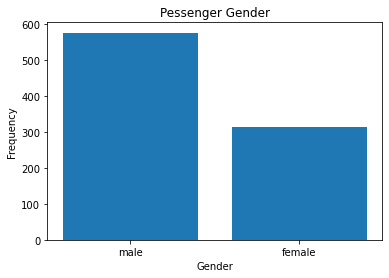

In [24]:
plt.bar(train['Sex'].value_counts().keys(),train['Sex'].value_counts())
plt.title("Pessenger Gender")
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.show()

In [25]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

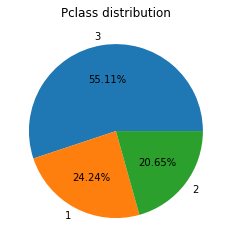

In [26]:
plt.pie(train['Pclass'].value_counts(),labels=train['Pclass'].value_counts().keys(),autopct='%0.2f%%')
plt.title("Pclass distribution")
plt.show()